4422102/4422102 [==============================] - 0s 0us/step
Forma de las etiquetas de entrenamiento: (60000, 10)
Forma de las etiquetas de prueba: (10000, 10)
Epoch 1/50
1500/1500 [==============================] - 22s 12ms/step - loss: 0.8753 - accuracy: 0.7579 - val_loss: 0.6268 - val_accuracy: 0.8297
Epoch 2/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6466 - accuracy: 0.8172 - val_loss: 0.5428 - val_accuracy: 0.8503
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6075 - accuracy: 0.8262 - val_loss: 0.5353 - val_accuracy: 0.8508
Epoch 4/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5845 - accuracy: 0.8318 - val_loss: 0.5049 - val_accuracy: 0.8546
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5777 - accuracy: 0.8322 - val_loss: 0.5213 - val_accuracy: 0.8518
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5683 - accuracy: 0.8357 - val_loss: 0

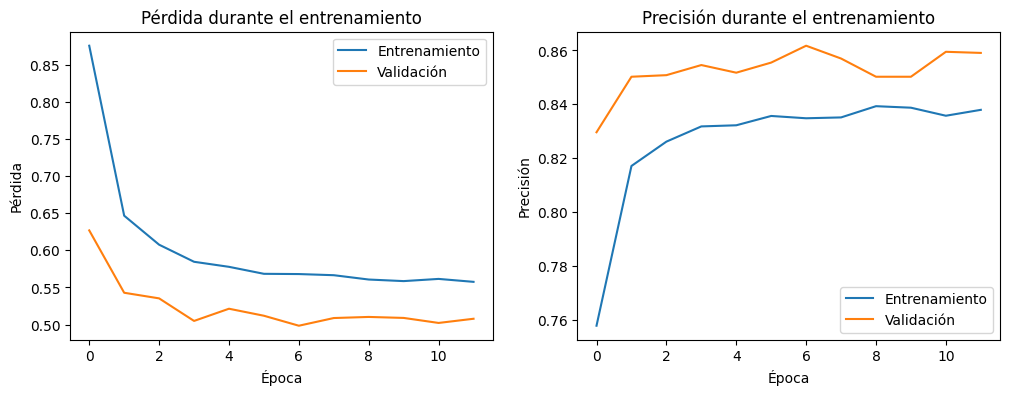

313/313 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8483

Test accuracy: 0.8482999801635742
313/313 [==============================] - 1s 3ms/step

Reporte de clasificación:

              precision    recall  f1-score   support

 T-shirt/top       0.71      0.90      0.79      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.77      0.71      0.74      1000
       Dress       0.88      0.85      0.87      1000
        Coat       0.73      0.80      0.76      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.65      0.50      0.57      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.95      0.93      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



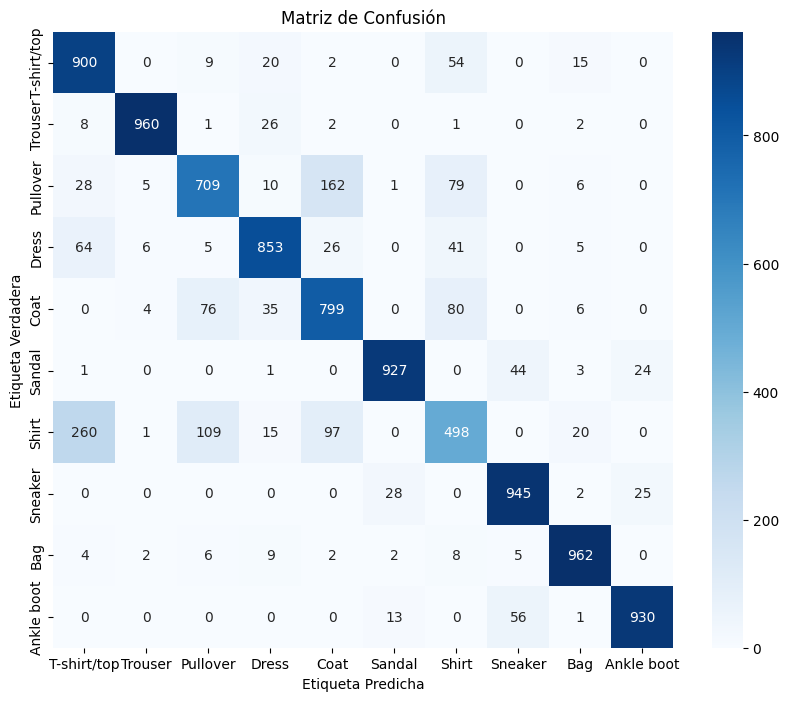

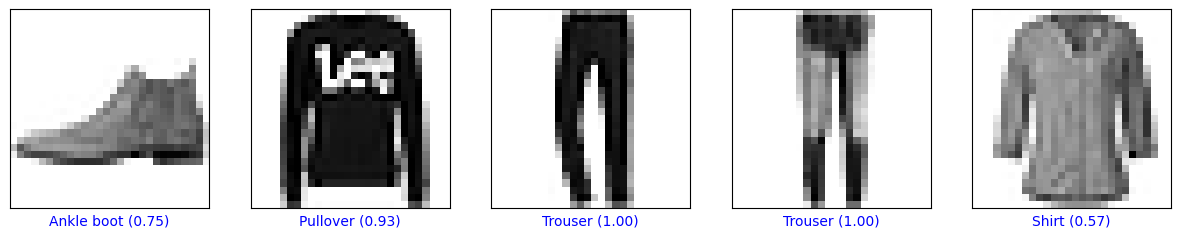

In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Definir los nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargar y preprocesar los datos
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertir las etiquetas a formato categórico
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Verificar las formas de las etiquetas
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

# Definir el modelo MLP con regularización y dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Capa para aplanar la imagen
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Capa oculta con 128 neuronas y ReLU
    Dropout(0.3),  # Capa de Dropout para evitar el sobreajuste
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),   # Capa oculta con 64 neuronas y ReLU
    Dropout(0.3),  # Otra capa de Dropout
    Dense(10, activation='softmax') # Capa de salida con 10 neuronas y softmax
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback de early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Graficar la evolución de la pérdida y la precisión
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.show()

plot_history(history)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc}')

# Generar reporte de clasificación
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

print("\nReporte de clasificación:\n")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Mostrar algunas predicciones con sus niveles de confianza
def plot_predictions(images, true_labels, predicted_labels, class_names, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        confidence = np.max(predictions[i])
        color = 'blue' if true_label == predicted_label else 'red'
        plt.xlabel(f"{predicted_label} ({confidence:.2f})", color=color)
    plt.show()

# Mostrar algunas predicciones
plot_predictions(test_images, true_labels, predicted_labels, class_names)
